# [Computational Social Science] Project 4: Unsupervised Learning

*Name:* Alex Schulte

*Semester:* Fall 2023

## Data Description and Preprocessing

For this project, you will explore data from the [National Health and Nutrition Examination Survey](https://www.kaggle.com/cdc/national-health-and-nutrition-examination-survey?select=questionnaire.csv). NHANES is a unique study that combines survey methodology with in-person medical examinations to create a dataset with demographic information, health indicators, and health outcomes.

We start by importing the data and doing some preliminary preprocessing for you. We import some libraries that will be helpful as well. 'SEQN' is the ID number for each respondent, and 'HSD010' will be our target outcome. [HSD010](https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/HSQ_H.htm#HSD010) asks for the respondent's self reported health condition, which can range from "excellent" to "poor."

In [1]:
pip install keras 

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/85/15/cf99a373812d37f8ae99752a34a9f5f690d820ceb5b302e922705bc18944/tensorflow-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for tensorflow-macos==2.15.0 from https://files.pythonhosted.org/packages/eb/9f/0759e2fea4a3c48f070b64811c2c57036b46353ba87263afc810b8f4188a/tensorflow_macos-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.5 MB/s eta 0:00:00
  Obtaining dependency information for libclang>=13.0.0 from https://files.pythonhosted.org/packages/32/1f/981809b77b71972beec34b3ff5422c1b1f7e519daac7b3cbd055c05ba2cf/libclang-16.0.6-py2.py3-none-macosx_11_0_arm64.whl.metadata
  Ob

  Obtaining dependency information for tensorboard-data-server<0.8.0,>=0.7.0 from https://files.pythonhosted.org/packages/7a/13/e503968fefabd4c6b2650af21e110aa8466fe21432cd7c43a84577a89438/tensorboard_data_server-0.7.2-py3-none-any.whl.metadata
  Obtaining dependency information for cachetools<6.0,>=2.0.0 from https://files.pythonhosted.org/packages/a2/91/2d843adb9fbd911e0da45fbf6f18ca89d07a087c3daa23e955584f90ebf4/cachetools-5.3.2-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.8/208.8 MB 7.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 31.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 28.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━

In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set_style("darkgrid")
from sklearn.model_selection import train_test_split

In [77]:
# Load nhanes data
nhanes = pd.read_csv('nhanes.csv')
# Get the ID numbers for each observation (seqn)
seqn = nhanes['SEQN']
# Get the target, "self-reported health condition," HSD010
hsd010 = nhanes['HSD010']
# Drop SEQN from the dataframe and then apply the standard scaler
nhanes = nhanes.drop(['SEQN', 'HSD010'], axis = 1)
nhanes_scaled = pd.DataFrame(StandardScaler().fit_transform(nhanes),
                             columns = nhanes.columns)
# Add the ID and target back in
nhanes_scaled['SEQN'] = seqn
nhanes_scaled['HSD010'] = hsd010
nhanes_scaled = nhanes_scaled.set_index('SEQN')
nhanes_scaled.head()

,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,...,OHQ770,OHQ845,PAAQUEX,SMQ860,SMQ870,SMQ872,SMQ874,SMQ878,SMAQUEX.x,HSD010
SEQN,,,,,,,,,,,,,,,,,,,,,
73568,0.0,2.034312,0.0,0.324834,-0.393906,1.085853,-0.194202,-0.057306,0.128246,-0.189513,...,0.383802,-0.646584,-0.484200,1.125008,0.0,-2.081666,1.087115,1.463404,0.612440,1
73576,0.0,0.261930,0.0,-3.078499,0.568251,0.634362,-0.194202,-0.057306,0.128246,0.080373,...,0.383802,-1.539259,-0.484200,1.125008,0.0,-2.081666,1.087115,-0.683338,-1.632812,1
73579,0.0,0.728346,0.0,0.324834,1.530407,-1.623092,-0.194202,-0.057306,0.128246,-0.189513,...,0.383802,-1.539259,2.065262,-0.888883,0.0,0.480384,-0.919866,-0.683338,-1.632812,2
73581,0.0,-0.857470,0.0,0.324834,0.480782,1.085853,-0.194202,-0.057306,0.128246,0.080373,...,0.383802,-0.646584,-0.484200,1.125008,0.0,0.480384,-0.919866,-0.683338,0.612440,2
73584,0.0,0.495138,0.0,0.324834,0.305844,-1.623092,-0.194202,-0.057306,0.128246,0.080373,...,-2.605509,0.246091,2.065262,1.125008,0.0,0.480384,-0.919866,1.463404,-1.632812,3


## Plots

Let's take a look at the data. Below we visualize boxplots of family income to federal poverty line ratio ('INDFMPIR') and self-reported health condition. Notice how there are some clear patterns (the lower the ratio, the lower reported health condition), but it's not a perfect separation. We have 240+ features in our dataset, and we likely have several features in our dataset that highly correlate with our family income-poverty line ratio measure - PCA will help us simplify these.

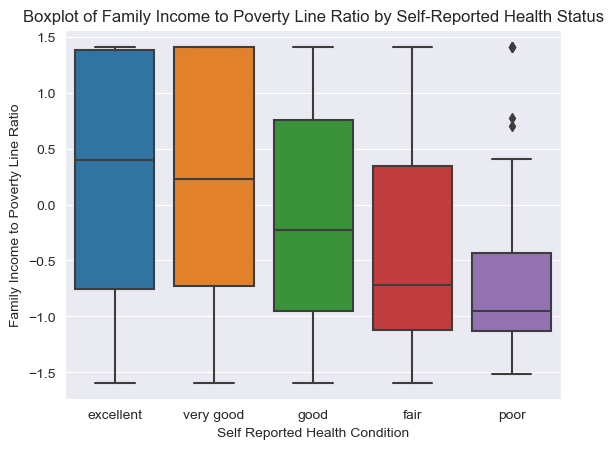

In [78]:
# Create a binary version of hsd010 where 1-3 are "good" and 4-5 are "poor"
nhanes_scaled['HSD010_binary'] = hsd010_binary = nhanes_scaled['HSD010'].replace(
    [1, 2, 3, 4, 5], ['good', 'good', 'good', 'poor', 'poor']) 
    # Recode the original hsd010 with the string labels
nhanes_scaled['HSD010'] = nhanes_scaled['HSD010'].replace(
    [1, 2, 3, 4, 5], ['excellent', 'very good', 'good', 'fair', 'poor'])
# Boxplot of hsd010
ax = sns.boxplot(x = 'HSD010', y = 'INDFMPIR', data = nhanes_scaled)
ax.set(xlabel = "Self Reported Health Condition",
      ylabel = "Family Income to Poverty Line Ratio")
ax.set_title("Boxplot of Family Income to Poverty Line Ratio by Self-Reported Health Status")
plt.show()

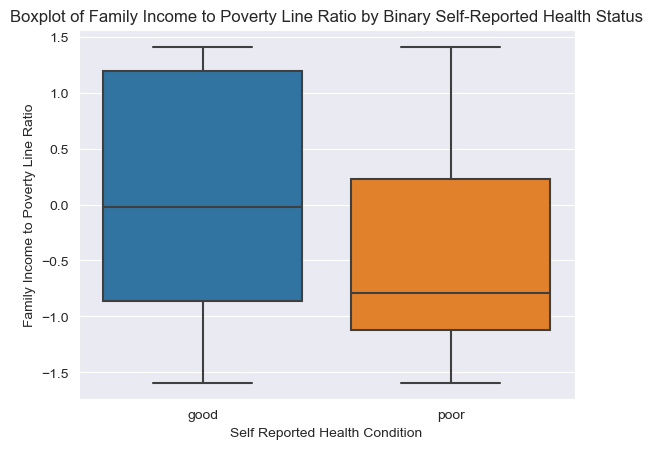

In [79]:
# Boxplot of hsd010_binary
ax = sns.boxplot(x = 'HSD010_binary', y = 'INDFMPIR', data = nhanes_scaled)
ax.set(xlabel = "Self Reported Health Condition",
      ylabel = "Family Income to Poverty Line Ratio")
ax.set_title("Boxplot of Family Income to Poverty Line Ratio by Binary Self-Reported Health Status")
plt.show()

Family income also is not necessarily well correlated with measured health outcomes. See below where we look at the relationship between Body Mass Index (BMI) and the family income-poverty line ratio, and shade points by self-reported health condition. It's hard to find a clear pattern - this is where clustering may come in handy. 

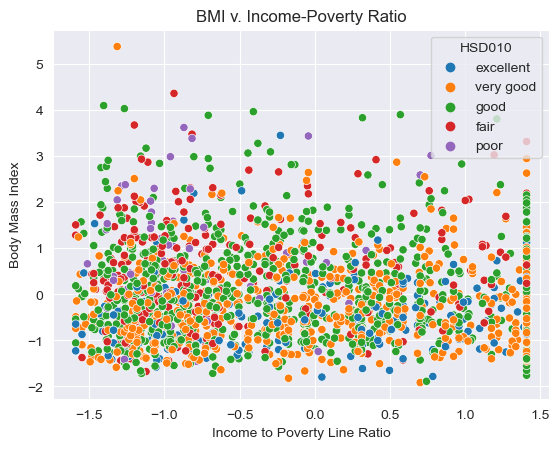

In [80]:
ax = sns.scatterplot(x = "INDFMPIR", y = "BMXBMI", hue = "HSD010", palette = "tab10", data = nhanes_scaled)
ax.set(xlabel = "Income to Poverty Line Ratio",
      ylabel = "Body Mass Index")
ax.set_title("BMI v. Income-Poverty Ratio")
plt.show()

Before we move to working on unsupervised methods, we'll drop our target variables again:

In [81]:
nhanes_scaled = nhanes_scaled.drop(['HSD010', 'HSD010_binary'], axis = 1)

## Principal Component Analysis

Conduct a Principal Component Analysis (PCA) of the nhanes data. The data has already been prepared for you, so you can work directly on nhanes_scaled. Be sure to do the following:

- Choose the number of components and provide 1-2 sentences about your choice of the number of components. 
- Plot a barplot of the variation explained by each component. *Hint*: look at the attributes associated with your model. 
- Choose how many components you will use to fit a supervised learning model and provide 1-2 sentences to explain that choice.
- Plot a 2D scatterplot of the first two components and provide 1-2 sentences analyzing the plot.

### Train PCA and Discuss Number of Components

In [82]:
nhanes_scaled.head()


,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,...,OHQ033,OHQ770,OHQ845,PAAQUEX,SMQ860,SMQ870,SMQ872,SMQ874,SMQ878,SMAQUEX.x
SEQN,,,,,,,,,,,,,,,,,,,,,
73568,0.0,2.034312,0.0,0.324834,-0.393906,1.085853,-0.194202,-0.057306,0.128246,-0.189513,...,-0.680203,0.383802,-0.646584,-0.484200,1.125008,0.0,-2.081666,1.087115,1.463404,0.612440
73576,0.0,0.261930,0.0,-3.078499,0.568251,0.634362,-0.194202,-0.057306,0.128246,0.080373,...,-0.680203,0.383802,-1.539259,-0.484200,1.125008,0.0,-2.081666,1.087115,-0.683338,-1.632812
73579,0.0,0.728346,0.0,0.324834,1.530407,-1.623092,-0.194202,-0.057306,0.128246,-0.189513,...,-0.680203,0.383802,-1.539259,2.065262,-0.888883,0.0,0.480384,-0.919866,-0.683338,-1.632812
73581,0.0,-0.857470,0.0,0.324834,0.480782,1.085853,-0.194202,-0.057306,0.128246,0.080373,...,-0.680203,0.383802,-0.646584,-0.484200,1.125008,0.0,0.480384,-0.919866,-0.683338,0.612440
73584,0.0,0.495138,0.0,0.324834,0.305844,-1.623092,-0.194202,-0.057306,0.128246,0.080373,...,-0.680203,-2.605509,0.246091,2.065262,1.125008,0.0,0.480384,-0.919866,1.463404,-1.632812


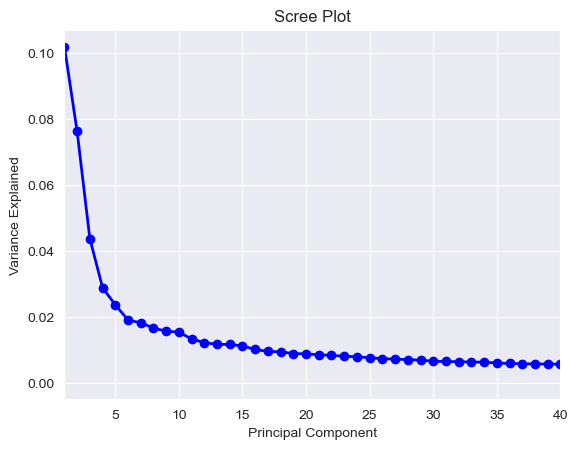

In [83]:

# Fit PCA 
pca_all = PCA()  
principalComponents_nhanes = pca_all.fit_transform(nhanes_scaled)

# Scree plot
PC_values = np.arange(pca_all.n_components_) + 1
plt.plot(PC_values, pca_all.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')

# Set x-axis limit to 40 to see when it drops off
plt.xlim(1, 40)

plt.show()


In [84]:
# Apply PCA with 6 components
pca = PCA(n_components=6)
principalComponents_nhanes = pca.fit_transform(nhanes_scaled)

#### I chose 6 components because that's when it seems like there is the biggest drop off in the graph (e.g., where we start to see diminishing returns.

### Barplot of Components

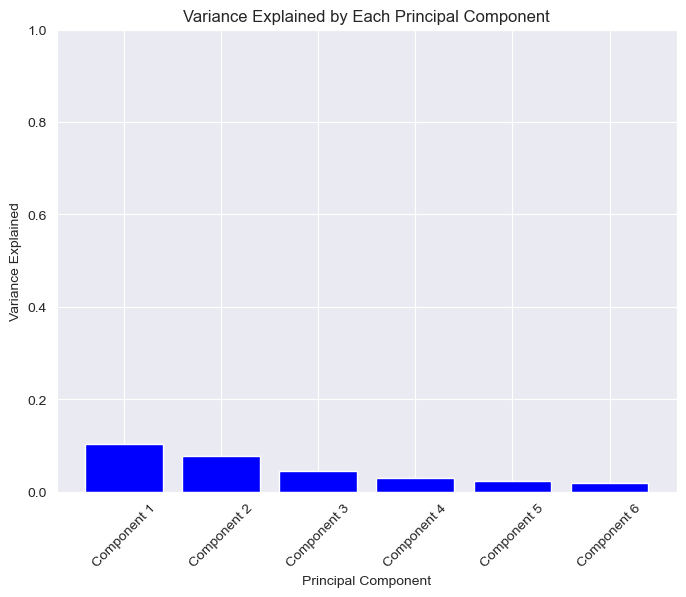

In [85]:
# variation explained by each component
explained_variance_ratio = pca.explained_variance_ratio_
component_labels = [f'Component {i + 1}' for i in range(len(explained_variance_ratio))]

plt.figure(figsize=(8, 6))
plt.bar(component_labels, explained_variance_ratio, color='blue')
plt.title('Variance Explained by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1) 
plt.xticks(rotation=45)  

plt.show()


### How many components will you use to fit a supervised learning model?

#### I will use 3 components. Given the bar plot above, it seems like components 4-6 explain relatively little variance.

### 2D Scatterplot of the first two components

In [86]:
import pandas as pd

# need a DataFrame from the principal components for the scatterplot
pca_df = pd.DataFrame(data=principalComponents_nhanes[:, :2],  # Use the first two components
                      columns=['Principal Component 1', 'Principal Component 2'])


In [87]:
# want to see the factor loadings as dataframe
pca_df.head()

,Principal Component 1,Principal Component 2
0,9.527811,-0.816226
1,-5.838339,-3.692573
2,-0.719454,-2.573201
3,3.533627,-2.576980
4,-6.872094,-4.194240


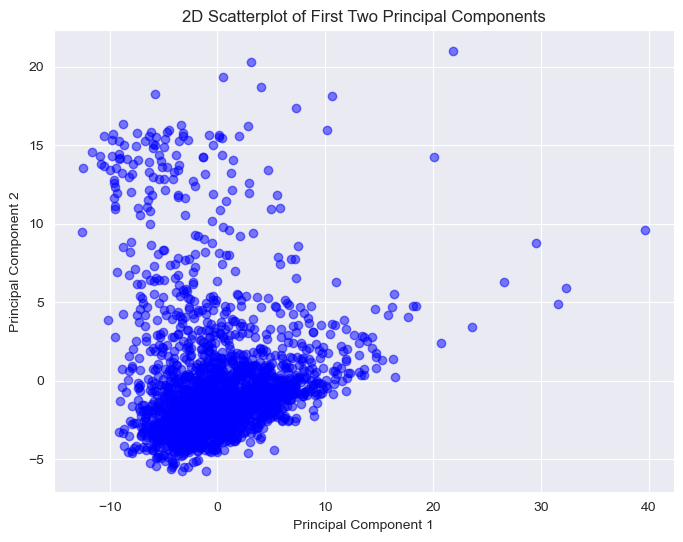

In [88]:

# get the first 2 PC
pc1 = principalComponents_nhanes[:, 0]
pc2 = principalComponents_nhanes[:, 1]

# scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(pc1, pc2, c='blue', alpha=0.5)
plt.title('2D Scatterplot of First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

plt.show()


#### It seems like there is some correlation between the components, but not much. Because we removed the label in this unsupervised method, we can't see how PC 1 and 2 relate to the target.

## K-Means

- Choose a clustering algorithm and explain it in 1-2 sentences.
- Cluster the nhanes data. Detail any choice you need to make with regards to number of clusters, and how you arrived at that choice. For instance, you might use the [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) if you choose k-means.
- Plot your clusters on top of BMI v. Income Poverty Ratio Plot. Describe what you see in 1-2 sentences.
- Retrain the clustering algorithm, but this time use your PCA results instead of the original dataframe. Plot the clusters on top of the 2D PCA scatterplot from the previous step. Describe your results in 1-2 sentences.

### Choose a Clustering Algorithm

/Users/alex/anaconda3/envs/CSS/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alex/anaconda3/envs/CSS/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alex/anaconda3/envs/CSS/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alex/anaconda3/envs/CSS/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

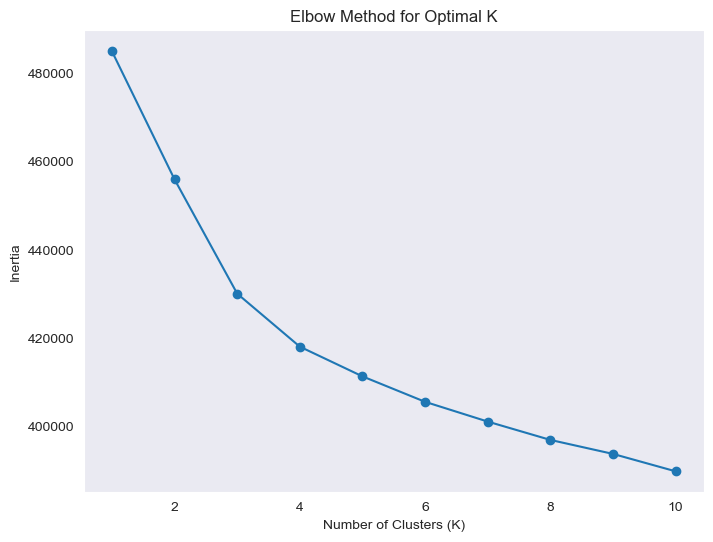

In [89]:
# need to create an empty list to store the inertia values
inertia_values = []

# range of K values to test. this seems like a plausible range of values to test
k_values = range(1, 11) 

# finding K-Means for each
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(nhanes_scaled)
    inertia_values.append(kmeans.inertia_)

# find the elbow point
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


#### It's hard to tell exactly, but it seems like 4 is where the inertia starts to decrease at a slower rate, so 4 would be the optimal number of clusters.

### Cluster nhanes

In [90]:
n_clusters = 4

# Fit K-Means 
kmeans = KMeans(n_clusters=n_clusters)
nhanes_scaled['Cluster'] = kmeans.fit_predict(nhanes_scaled)


/Users/alex/anaconda3/envs/CSS/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Plot your clusters on top of the BMI v. Income Poverty Ratio Plot

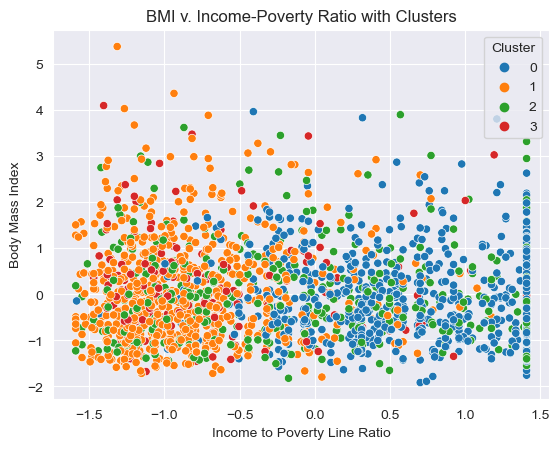

In [91]:

# scatterplot
ax = sns.scatterplot(x="INDFMPIR", y="BMXBMI", hue="Cluster", palette="tab10", data=nhanes_scaled)
ax.set(xlabel="Income to Poverty Line Ratio", ylabel="Body Mass Index")
ax.set_title("BMI v. Income-Poverty Ratio with Clusters")

plt.show()


#### It seems like at all BMI levels, 0 cluster captures higher income observations and cluster 1 caputures lower income observations. It's hard to tell for clusters 3 and 2.

### Retrain the clustering algorithm on PCA components and plot clusters on your 2D scatter

/Users/alex/anaconda3/envs/CSS/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


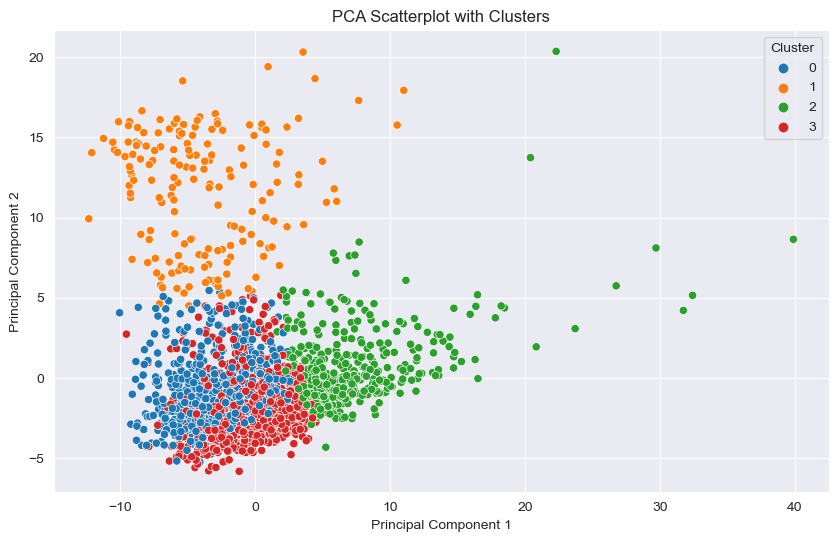

In [92]:
# PCA with 3 components
pca = PCA(n_components=3)
principalComponents_nhanes = pca.fit_transform(nhanes_scaled)

# using 4 clusters
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
nhanes_scaled['Cluster'] = kmeans.fit_predict(principalComponents_nhanes)

# scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=principalComponents_nhanes[:, 0], y=principalComponents_nhanes[:, 1], hue=nhanes_scaled['Cluster'], palette='tab10')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatterplot with Clusters')
plt.legend(title='Cluster', loc='upper right')
plt.show()


It seems like the combination of PCA and clusters does nicely parse the data - it's more interpretable than when I just ploted PC1 vs. PC 2. For example, cluster 1 has higher values for PC2 and lower values for PC1, and vice versa for cluster 2. 

It's interesting to compare the clustering here vs the BMI and income/poverty graph above. In both graphs, cluster 1 seems well "clustered," (ie the algorithm groups the observations into something that has a clear trend/difference in the graph compared to the other clusters).

## Neural Network

Now we are ready to predict! Do the following:

- Choose either HSD010 or HSD010\_binary as your target outcome.  
- Train a neural network using the original features. Much of the code to train a basic neural net has been set up for you, but you will need to fill in a couple of missing pieces.
- Train a neural network using only your PCA components as features.
- Train a neural network using your PCA components and the predicted class membership from your clustering algorithm as features.
- Compare and contrast how well each algorithm did. Which featurization technique would you pick and why?

Below we provide a template for training a neural network. Use this template for training on the original features, on the PCA components, and the PCA components + the predicted classes from your clusters.

### Neural Network on Original Features

In [93]:
nhanes_scaled.head(20)

,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,...,OHQ770,OHQ845,PAAQUEX,SMQ860,SMQ870,SMQ872,SMQ874,SMQ878,SMAQUEX.x,Cluster
SEQN,,,,,,,,,,,,,,,,,,,,,
73568,0.0,2.034312,0.0,0.324834,-0.393906,1.085853,-0.194202,-0.057306,0.128246,-0.189513,...,0.383802,-0.646584,-0.484200,1.125008,0.0,-2.081666,1.087115,1.463404,0.612440,2
73576,0.0,0.261930,0.0,-3.078499,0.568251,0.634362,-0.194202,-0.057306,0.128246,0.080373,...,0.383802,-1.539259,-0.484200,1.125008,0.0,-2.081666,1.087115,-0.683338,-1.632812,0
73579,0.0,0.728346,0.0,0.324834,1.530407,-1.623092,-0.194202,-0.057306,0.128246,-0.189513,...,0.383802,-1.539259,2.065262,-0.888883,0.0,0.480384,-0.919866,-0.683338,-1.632812,3
73581,0.0,-0.857470,0.0,0.324834,0.480782,1.085853,-0.194202,-0.057306,0.128246,0.080373,...,0.383802,-0.646584,-0.484200,1.125008,0.0,0.480384,-0.919866,-0.683338,0.612440,3
73584,0.0,0.495138,0.0,0.324834,0.305844,-1.623092,-0.194202,-0.057306,0.128246,0.080373,...,-2.605509,0.246091,2.065262,1.125008,0.0,0.480384,-0.919866,1.463404,-1.632812,0
73585,0.0,0.728346,0.0,-3.078499,-0.568844,-0.268620,-0.194202,-0.057306,0.128246,-0.189513,...,0.383802,-1.539259,-0.484200,1.125008,0.0,0.480384,-0.919866,-0.683338,0.612440,2
73587,0.0,1.288046,0.0,0.324834,2.754971,0.634362,-0.194202,-0.057306,0.128246,-0.189513,...,0.383802,1.138766,2.065262,1.125008,0.0,0.480384,1.087115,1.463404,-1.632812,0
73595,0.0,0.914913,0.0,0.324834,-0.044031,-1.171601,-0.194202,-0.057306,0.128246,-0.189513,...,0.383802,1.138766,-0.484200,1.125008,0.0,0.480384,1.087115,1.463404,0.612440,3
73596,0.0,-0.857470,0.0,0.324834,-0.481375,-1.623092,-0.194202,-0.057306,0.128246,-0.189513,...,0.383802,-0.646584,-0.484200,-0.888883,0.0,0.480384,-0.919866,-0.683338,0.612440,3


In [94]:
# I need to rerun to get the original dataset 

# Load nhanes data
nhanes = pd.read_csv('nhanes.csv')
# Get the ID numbers for each observation (seqn)
seqn = nhanes['SEQN']
# Get the target, "self-reported health condition," HSD010
hsd010 = nhanes['HSD010']
# Drop SEQN from the dataframe and then apply the standard scaler
nhanes = nhanes.drop(['SEQN', 'HSD010'], axis = 1)
nhanes_scaled = pd.DataFrame(StandardScaler().fit_transform(nhanes),
                             columns = nhanes.columns)
# Add the ID and target back in
nhanes_scaled['SEQN'] = seqn
nhanes_scaled['HSD010'] = hsd010
nhanes_scaled = nhanes_scaled.set_index('SEQN')
nhanes_scaled.head()

# Create a binary version of hsd010 where 1-3 are "good" and 4-5 are "poor"
nhanes_scaled['HSD010_binary'] = hsd010_binary = nhanes_scaled['HSD010'].replace(
    [1, 2, 3, 4, 5], ['good', 'good', 'good', 'poor', 'poor']) 
    # Recode the original hsd010 with the string labels
nhanes_scaled['HSD010'] = nhanes_scaled['HSD010'].replace(
    [1, 2, 3, 4, 5], ['excellent', 'very good', 'good', 'fair', 'poor'])


In [95]:
# unique values in the 'HSD010_binary' column
unique_values = nhanes_scaled['HSD010_binary'].unique()
unique_values



array(['good', 'poor'], dtype=object)

In [96]:
# Map 'good' to 1 and 'poor' to 0
nhanes_scaled['HSD010_binary'] = nhanes_scaled['HSD010_binary'].map({'good': 1, 'poor': 0})

# Check the unique values again to confirm the conversion
unique_values_updated = nhanes_scaled['HSD010_binary'].unique()

unique_values_updated

array([1, 0])

In [97]:
# partition data
# -----------
y = nhanes_scaled['HSD010_binary'] 
X = nhanes_scaled.drop(['HSD010', 'HSD010_binary'], axis = 1) 



In [98]:
y

SEQN
73568    1
73576    1
73579    1
73581    1
73584    1
        ..
83694    1
83696    1
83704    0
83716    1
83721    1
Name: HSD010_binary, Length: 2064, dtype: int64

In [99]:
X

,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,...,OHQ033,OHQ770,OHQ845,PAAQUEX,SMQ860,SMQ870,SMQ872,SMQ874,SMQ878,SMAQUEX.x
SEQN,,,,,,,,,,,,,,,,,,,,,
73568,0.0,2.034312,0.0,0.324834,-0.393906,1.085853,-0.194202,-0.057306,0.128246,-0.189513,...,-0.680203,0.383802,-0.646584,-0.484200,1.125008,0.0,-2.081666,1.087115,1.463404,0.612440
73576,0.0,0.261930,0.0,-3.078499,0.568251,0.634362,-0.194202,-0.057306,0.128246,0.080373,...,-0.680203,0.383802,-1.539259,-0.484200,1.125008,0.0,-2.081666,1.087115,-0.683338,-1.632812
73579,0.0,0.728346,0.0,0.324834,1.530407,-1.623092,-0.194202,-0.057306,0.128246,-0.189513,...,-0.680203,0.383802,-1.539259,2.065262,-0.888883,0.0,0.480384,-0.919866,-0.683338,-1.632812
73581,0.0,-0.857470,0.0,0.324834,0.480782,1.085853,-0.194202,-0.057306,0.128246,0.080373,...,-0.680203,0.383802,-0.646584,-0.484200,1.125008,0.0,0.480384,-0.919866,-0.683338,0.612440
73584,0.0,0.495138,0.0,0.324834,0.305844,-1.623092,-0.194202,-0.057306,0.128246,0.080373,...,-0.680203,-2.605509,0.246091,2.065262,1.125008,0.0,0.480384,-0.919866,1.463404,-1.632812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83694,0.0,0.261930,0.0,0.324834,-0.481375,1.085853,-0.194202,-0.057306,0.128246,-0.189513,...,0.998146,0.383802,-0.646584,-0.484200,1.125008,0.0,0.480384,1.087115,-0.683338,0.612440
83696,0.0,0.495138,0.0,0.324834,1.093063,0.634362,-0.194202,-0.057306,0.128246,-0.189513,...,0.998146,0.383802,0.246091,-0.484200,1.125008,0.0,-2.081666,1.087115,-0.683338,-1.632812
83704,0.0,0.728346,0.0,-3.078499,0.305844,-0.268620,-0.194202,-0.057306,0.128246,0.080373,...,-0.680203,0.383802,2.031441,2.065262,1.125008,0.0,0.480384,-0.919866,-0.683338,-1.632812


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = .25, 
                                                    random_state = 10)

In [101]:
import keras
from keras.utils import to_categorical

# Determine the number of classes in your target variable
num_classes = 2  # Assuming it's binary classification (0 or 1)

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [103]:
y

SEQN
73568    1
73576    1
73579    1
73581    1
73584    1
        ..
83694    1
83696    1
83704    0
83716    1
83721    1
Name: HSD010_binary, Length: 2064, dtype: int64

In [104]:
num_features = X_train.shape[1]
num_features

241

In [105]:
# kept getting an error with the model.fit function below, so doing a bit of extra work to investigate and try to fix

print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of y_train: (1548, 2)
Shape of y_test: (516, 2)


In [106]:
#online it said this may help
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # 1= 'good' and 0='poor' 

# split your data again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)


In [107]:
# using hyperparameters that seemed relatively general / accepted practice for neural networks
# if i was doing this for real, i would do a lot of testing with different values and parameters

model = Sequential()

# Add an input layer with appropriate number of units/neurons (you can experiment with this)
model.add(Dense(128, input_dim=num_features, kernel_initializer='glorot_uniform', activation='relu'))

# Add one or more hidden layers (you can experiment with the number of units and layers)
model.add(Dense(64, kernel_initializer='glorot_uniform', activation='relu'))

# Add an output layer with a single neuron and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with appropriate loss function, optimizer, and evaluation metric
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [108]:
# Specify the training data, labels, validation data, number of epochs, and batch size
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=1)


Epoch 1/20
49/49 [==============================] - 0s 3ms/step - loss: 0.4183 - accuracy: 0.8372 - val_loss: 0.3596 - val_accuracy: 0.8566
Epoch 2/20
49/49 [==============================] - 0s 1ms/step - loss: 0.2652 - accuracy: 0.9005 - val_loss: 0.3549 - val_accuracy: 0.8527
Epoch 3/20
49/49 [==============================] - 0s 1ms/step - loss: 0.1956 - accuracy: 0.9251 - val_loss: 0.3577 - val_accuracy: 0.8508
Epoch 4/20
49/49 [==============================] - 0s 1ms/step - loss: 0.1427 - accuracy: 0.9483 - val_loss: 0.3690 - val_accuracy: 0.8663
Epoch 5/20
49/49 [==============================] - 0s 1ms/step - loss: 0.0947 - accuracy: 0.9748 - val_loss: 0.4058 - val_accuracy: 0.8624
Epoch 6/20
49/49 [==============================] - 0s 1ms/step - loss: 0.0630 - accuracy: 0.9851 - val_loss: 0.4286 - val_accuracy: 0.8643
Epoch 7/20
49/49 [==============================] - 0s 1ms/step - loss: 0.0398 - accuracy: 0.9948 - val_loss: 0.4827 - val_accuracy: 0.8682
Epoch 8/20
49/49 [==

### Neural Network on Principal Components

In [124]:
principalComponents_nhanes

array([[ 9.61141403, -0.84331891, -1.91701993],
       [-5.71401766, -3.90487848,  3.72906785],
       [-0.65305273, -2.65329307,  0.85980658],
       ...,
       [ 1.06723868, -0.8150476 ,  3.485287  ],
       [ 7.22075628, -0.41989253,  1.69983393],
       [ 0.09861967, -1.04069192, -4.47094208]])

In [113]:
#  PCA-transformed data with only the first 3 components as features
X_pca = principalComponents_nhanes[:, :3]  

#  training and testing sets
from sklearn.model_selection import train_test_split

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=10)


# Define the neural network model. using similar values and parameters as above
# as stated, if i was doing this for real (ie not a class assignment), i would try/test out a lot of others
model = Sequential()
model.add(Dense(units=32, input_dim=3, activation='relu'))  # layer with 3 units
model.add(Dense(units=16, activation='relu'))  # Hidden layer with 16 units
model.add(Dense(units=1, activation='sigmoid'))  # Output layer with 1 unit (for binary classification)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_pca, y_train, validation_data=(X_test_pca, y_test), epochs=20, batch_size=32, verbose=1)

# evaluate 
loss, accuracy = model.evaluate(X_test_pca, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Epoch 1/20
49/49 [==============================] - 0s 3ms/step - loss: 0.4921 - accuracy: 0.8256 - val_loss: 0.4184 - val_accuracy: 0.8333
Epoch 2/20
49/49 [==============================] - 0s 931us/step - loss: 0.4059 - accuracy: 0.8340 - val_loss: 0.3962 - val_accuracy: 0.8411
Epoch 3/20
49/49 [==============================] - 0s 865us/step - loss: 0.3912 - accuracy: 0.8340 - val_loss: 0.3874 - val_accuracy: 0.8450
Epoch 4/20
49/49 [==============================] - 0s 853us/step - loss: 0.3806 - accuracy: 0.8417 - val_loss: 0.3798 - val_accuracy: 0.8527
Epoch 5/20
49/49 [==============================] - 0s 877us/step - loss: 0.3740 - accuracy: 0.8495 - val_loss: 0.3827 - val_accuracy: 0.8566
Epoch 6/20
49/49 [==============================] - 0s 878us/step - loss: 0.3735 - accuracy: 0.8463 - val_loss: 0.3766 - val_accuracy: 0.8547
Epoch 7/20
49/49 [==============================] - 0s 861us/step - loss: 0.3710 - accuracy: 0.8488 - val_loss: 0.3753 - val_accuracy: 0.8663
Epoch 8/

In [114]:
# using this code for evaluation since i'm more familiar with these scores

from sklearn.metrics import precision_score, recall_score, f1_score

# predicting binary classes on the test data
y_pred = model.predict(X_test_pca)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert predicted probabilities to binary values (0 or 1)

precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


17/17 [==============================] - 0s 479us/step
Precision: 0.8827
Recall: 0.9795
F1-score: 0.9286


F-1 score is a balance of precision and recall, and is helpful for considering both false positives and negatives. From what I recall from the class examples, 0.93 is pretty good.

### Neural Network on Principal Components + Cluster Membership

*I've been trying a bunch of things, but I can't get this code to run. I think I'm just getting mixed up with the sequence to load the original data, then do PCA, then cluster, then neural network, but I can't figure it out. Apologies, but I'm going to skip this even though I don't have an answer.*

In [121]:
#  original dataset 

# Load nhanes data
nhanes = pd.read_csv('nhanes.csv')
# Get the ID numbers for each observation (seqn)
seqn = nhanes['SEQN']
# Get the target, "self-reported health condition," HSD010
hsd010 = nhanes['HSD010']
# Drop SEQN from the dataframe and then apply the standard scaler
nhanes = nhanes.drop(['SEQN', 'HSD010'], axis = 1)
nhanes_scaled = pd.DataFrame(StandardScaler().fit_transform(nhanes),
                             columns = nhanes.columns)
# Add the ID and target back in
nhanes_scaled['SEQN'] = seqn
nhanes_scaled['HSD010'] = hsd010
nhanes_scaled = nhanes_scaled.set_index('SEQN')
nhanes_scaled.head()

# Create a binary version of hsd010 where 1-3 are "good" and 4-5 are "poor"
nhanes_scaled['HSD010_binary'] = hsd010_binary = nhanes_scaled['HSD010'].replace(
    [1, 2, 3, 4, 5], ['good', 'good', 'good', 'poor', 'poor']) 
    # Recode the original hsd010 with the string labels
nhanes_scaled['HSD010'] = nhanes_scaled['HSD010'].replace(
    [1, 2, 3, 4, 5], ['excellent', 'very good', 'good', 'fair', 'poor'])


In [122]:
nhanes_scaled.head()

,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,...,OHQ845,PAAQUEX,SMQ860,SMQ870,SMQ872,SMQ874,SMQ878,SMAQUEX.x,HSD010,HSD010_binary
SEQN,,,,,,,,,,,,,,,,,,,,,
73568,0.0,2.034312,0.0,0.324834,-0.393906,1.085853,-0.194202,-0.057306,0.128246,-0.189513,...,-0.646584,-0.484200,1.125008,0.0,-2.081666,1.087115,1.463404,0.612440,excellent,good
73576,0.0,0.261930,0.0,-3.078499,0.568251,0.634362,-0.194202,-0.057306,0.128246,0.080373,...,-1.539259,-0.484200,1.125008,0.0,-2.081666,1.087115,-0.683338,-1.632812,excellent,good
73579,0.0,0.728346,0.0,0.324834,1.530407,-1.623092,-0.194202,-0.057306,0.128246,-0.189513,...,-1.539259,2.065262,-0.888883,0.0,0.480384,-0.919866,-0.683338,-1.632812,very good,good
73581,0.0,-0.857470,0.0,0.324834,0.480782,1.085853,-0.194202,-0.057306,0.128246,0.080373,...,-0.646584,-0.484200,1.125008,0.0,0.480384,-0.919866,-0.683338,0.612440,very good,good
73584,0.0,0.495138,0.0,0.324834,0.305844,-1.623092,-0.194202,-0.057306,0.128246,0.080373,...,0.246091,2.065262,1.125008,0.0,0.480384,-0.919866,1.463404,-1.632812,good,good


In [123]:
# PCA with 3 components
pca = PCA(n_components=3)
principalComponents_nhanes = pca.fit_transform(nhanes_scaled)



ValueError: could not convert string to float: 'excellent'

In [ ]:
# Using 4 clusters
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
nhanes_scaled['Cluster'] = kmeans.fit_predict(principalComponents_nhanes)


In [117]:

# target variable
y = nhanes_scaled['HSD010_binary']

# Combine PCA components and cluster labels
X_combined = np.column_stack((principalComponents_nhanes, nhanes_scaled['Cluster']))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.25, random_state=10)

# Create the neural network model
model = Sequential()
model.add(Dense(units=32, input_dim=X_combined.shape[1], activation='relu'))  # Input 
model.add(Dense(units=16, activation='relu'))  # Hidden 
model.add(Dense(units=1, activation='sigmoid'))  # Output 

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=1)


/Users/alex/anaconda3/envs/CSS/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyError: 'HSD010_binary'

## Discussion Questions

1. In your own words, what is the difference between PCA and clustering?

*PCA and clustering are both techniques in unsupervised ML. I would say the main difference is PCA is a dimensionality reduction technique - it finds a low-dimensional representation of a data set that contains as much as possible of the variation. On the other hand, the goal of clustering is to discover underlying patterns in the data and segment it into meaningful clusters.*

2. Did you notice any advantages to combining PCA and clustering? If so, what do you think they were? If not, why do you think you didn't see any gains from this combination?

*Although I couldn't get the final chunk of code to run, I did notice several advantages of combining PCA and clustering throughout this project. For one, combining these techniques can lead to improved visualization, as we saw when we plotted the clusters on the PC1 vs. PC2 graph. Additionally, it can help with interpretability - meaning reduced dimensionality makes it easier to interpret the clusters and understand the characteristics of data points within each cluster. Depending on the data, it could also aid in the identification of the key features that contribute to creating the clusters.*

3. How can unsupervised techniques help with downstream supervised learning tasks when working with "big data?"

*Dimensionality reductions seems like a key way unsupervised techniques could help with supervised tasks. In the 4-1 lab at the very end, we compared a 'normal' logistic regression model with one trained on just the PCA features. The models did about the same on the confusion matrix metrics, but we noted in the lab that with "big data" the computational time that we would save with PCA would be significant.*